# Image Clustering Experiments

This notebook is for experimenting with image clustering. It requires the following libraries to be installed:

- `numpy`
- `pandas`
- `matplotlib`
- `scikit-learn`
- `opencv-python`
- `clustimage`

In [26]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [10]:
# Set the path to the folder containing images
image_folder = "flashpoint-ss"

# Parameters
num_clusters = 2  # Number of clusters
image_size = (64, 64)  # Resize images to this size for uniformity

# Function to load and preprocess images
def load_images(image_folder, image_size):
    images = []
    file_names = []
    for file_name in os.listdir(image_folder):
        if file_name.endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(image_folder, file_name)
            # Read and resize image
            img = cv2.imread(file_path)
            img = cv2.resize(img, image_size)
            # Flatten the image
            img_flat = img.flatten()
            images.append(img_flat)
            file_names.append(file_name)
    return np.array(images), file_names

# Load and preprocess images
image_data, file_names = load_images(image_folder, image_size)

/Users/zleblanc/.virtualenvs/data-work-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


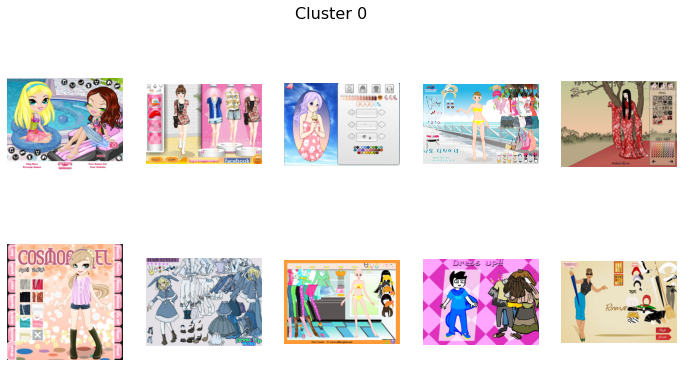

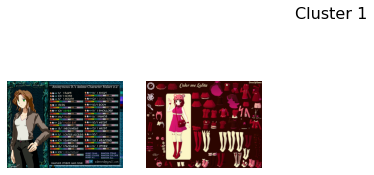

In [11]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(image_data)

# Visualize some images from each cluster
def plot_clusters(image_folder, clusters, file_names, num_clusters):
    for cluster in range(num_clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        plt.figure(figsize=(12, 6))
        plt.suptitle(f"Cluster {cluster}", fontsize=16)
        for i, idx in enumerate(cluster_indices[:10]):  # Display up to 10 images per cluster
            img_path = os.path.join(image_folder, file_names[idx])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
            plt.subplot(2, 5, i + 1)
            plt.imshow(img)
            plt.axis("off")
        plt.show()

# Plot images in clusters
plot_clusters(image_folder, clusters, file_names, num_clusters)

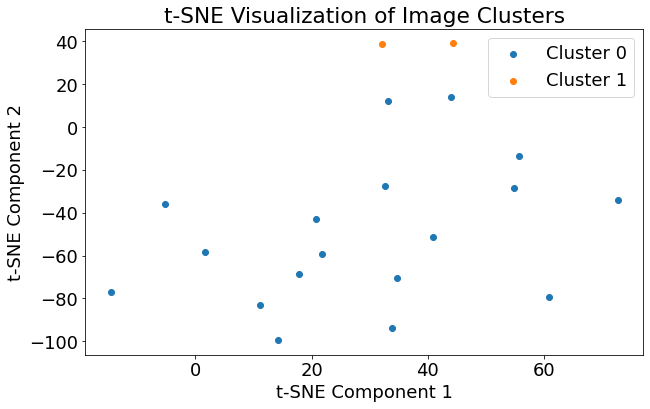

In [25]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=20)  # Reduce to 20 dimensions
image_data_pca = pca.fit_transform(image_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(image_data_pca)
labels = kmeans.labels_

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # Set perplexity to a value less than the number of samples
image_data_tsne = tsne.fit_transform(image_data_pca)

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_points = image_data_tsne[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.legend()
plt.title('t-SNE Visualization of Image Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [19]:
from clustimage import Clustimage

# Create a Clustimage object
cl = Clustimage(method='pca')
X = cl.import_data(image_folder)

[clustimage] >INFO> Extracting images from: [flashpoint-ss]
[clustimage] >INFO> [6] files are collected recursively from path: [flashpoint-ss]
[clustimage] >INFO> [6] images are extracted.
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
[clustimage]: 100%|██████████| 6/6 [00:00<00:00, 12.40it/s]


In [21]:
results = cl.fit_transform(X)

[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Skipping import because import is already performed outside the fit_transform()
[clustimage] >INFO> Extracting features using method: [pca]
[clustimage] >INFO> Extracted features using [pca]: samples=6, features=5
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.
[clustimage] >INFO> Saving data in memory.
[clustimage] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clustimage] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 22/22 [00:00<00:00, 4342.54it/s]
[clustimage] >INFO> Compute dendrogram threshold.
[clustimage] >INFO> Optimal number clusters detected: [3].
[clustimage] >INFO> Fin.
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (6, 5) feature-space.


[clustimage] >INFO> Add transparency to RGB colors (last column)
[clustimage] >INFO> Add transparency to RGB colors (last column)
[clustimage] >INFO> Create scatterplot


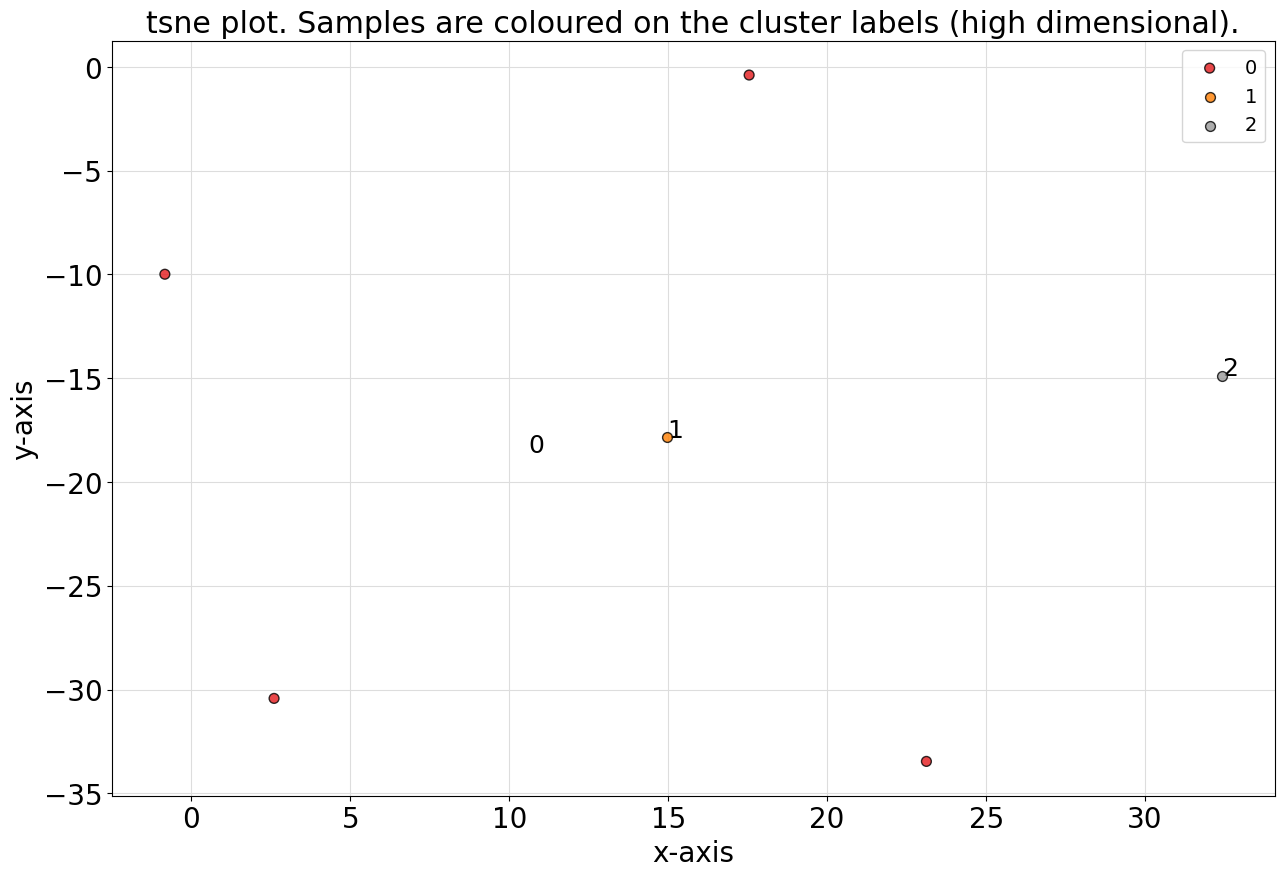

[clustimage] >INFO> Add transparency to RGB colors (last column)
[clustimage] >INFO> Add transparency to RGB colors (last column)
[clustimage] >INFO> Create scatterplot


<Figure size 432x288 with 0 Axes>

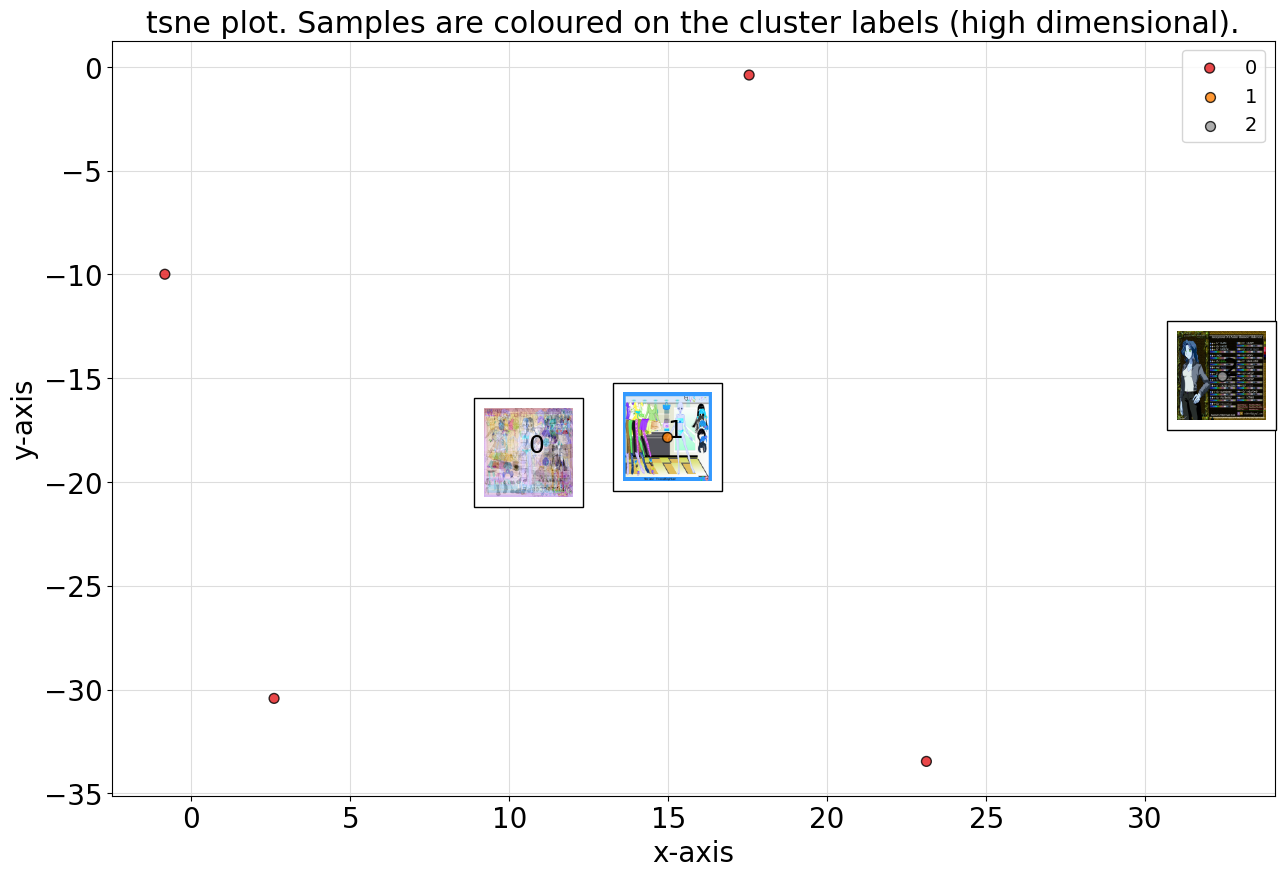

[clustimage] >INFO> Add transparency to RGB colors (last column)
[clustimage] >INFO> Add transparency to RGB colors (last column)
[clustimage] >INFO> Create scatterplot


<Figure size 432x288 with 0 Axes>

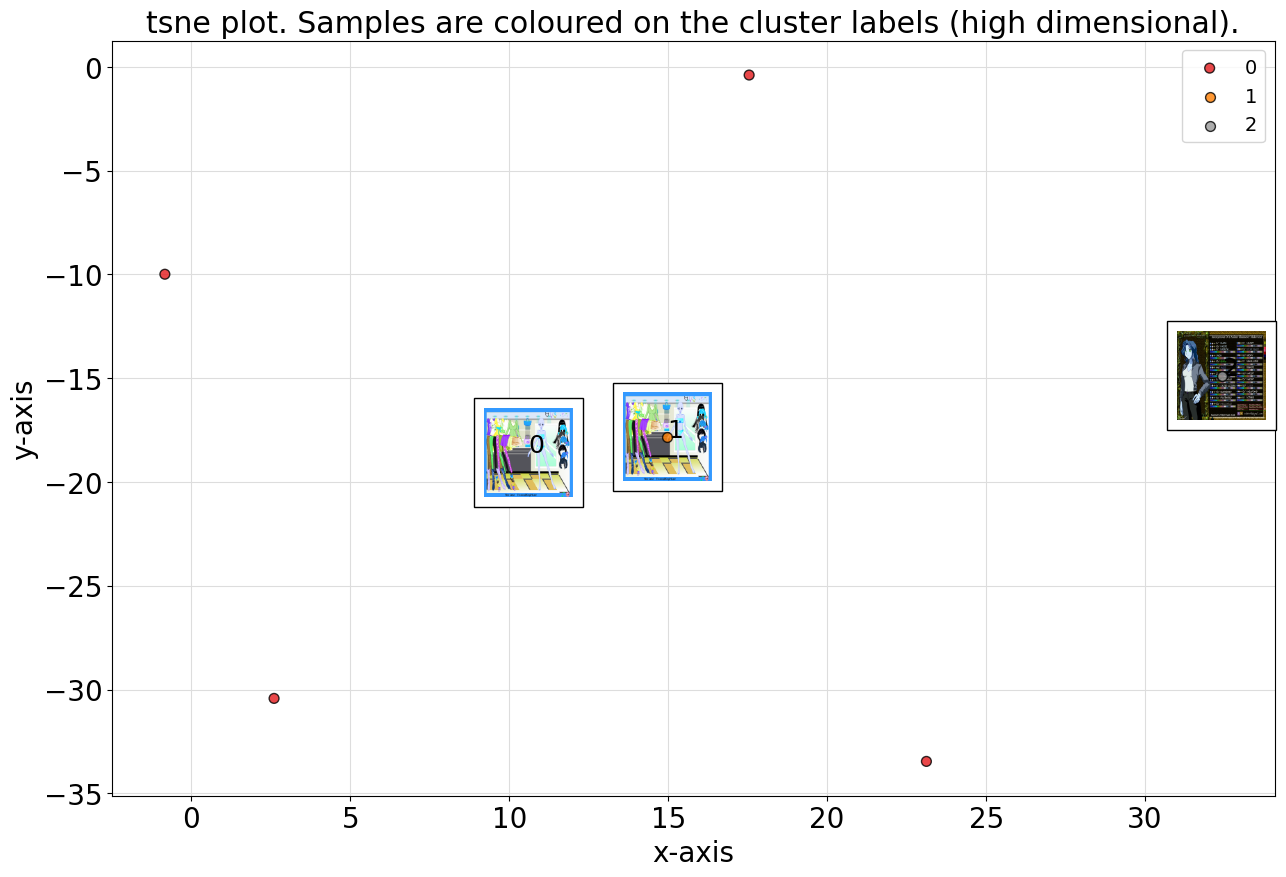

[clustimage] >INFO> Add transparency to RGB colors (last column)
[clustimage] >INFO> Add transparency to RGB colors (last column)
[clustimage] >INFO> Create scatterplot


<Figure size 432x288 with 0 Axes>

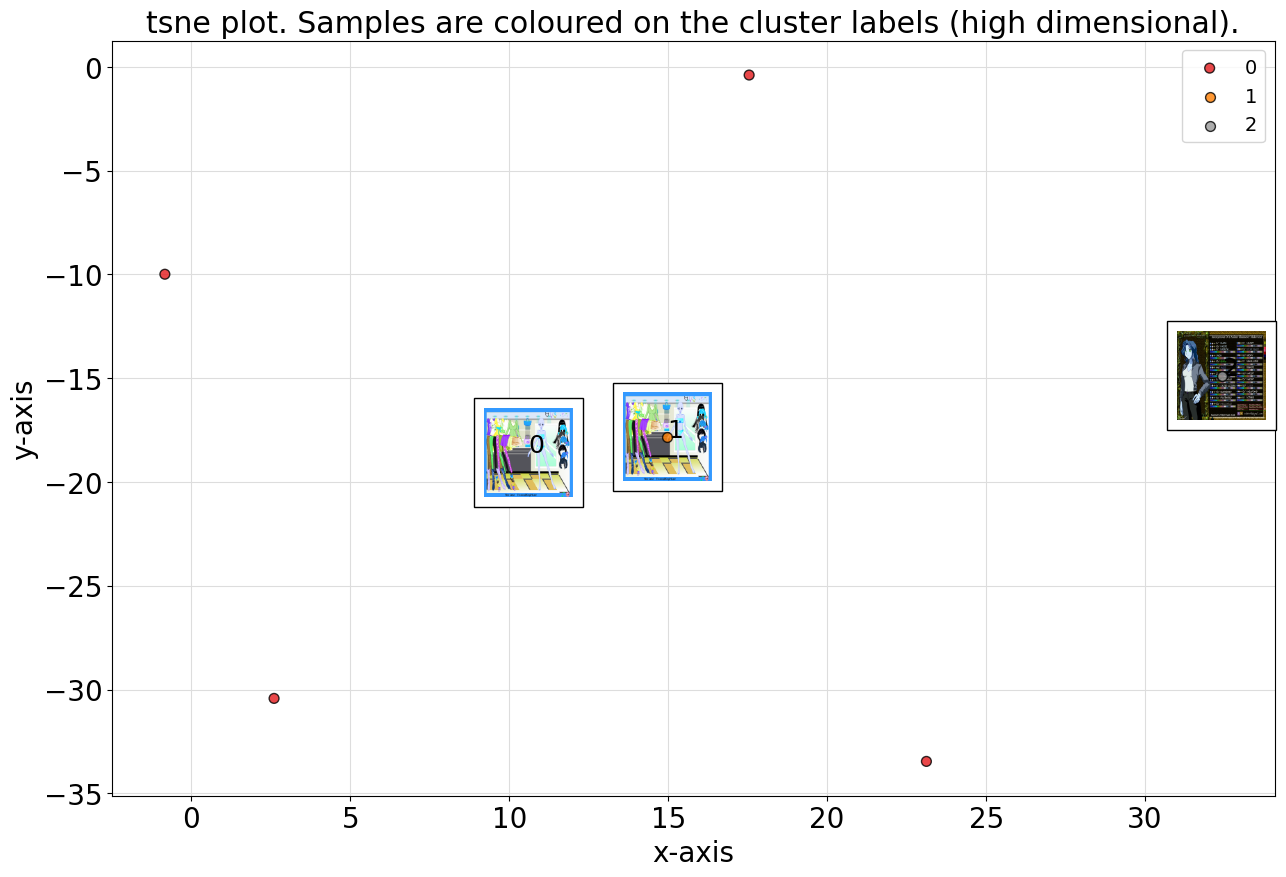

[clustimage] >INFO> Add transparency to RGB colors (last column)
[clustimage] >INFO> Add transparency to RGB colors (last column)
[clustimage] >INFO> Create scatterplot


<Figure size 432x288 with 0 Axes>

(<Figure size 15000x10000 with 1 Axes>,
 <Axes: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 432x288 with 0 Axes>

In [22]:
cl.scatter(dotsize=50, zoom=None)
cl.scatter(dotsize=50, zoom=0.5)
cl.scatter(dotsize=50, zoom=0.5, img_mean=False)
cl.scatter(dotsize=50, zoom=0.5, img_mean=False)
cl.scatter(zoom=1.2, plt_all=True, figsize=(150,100))

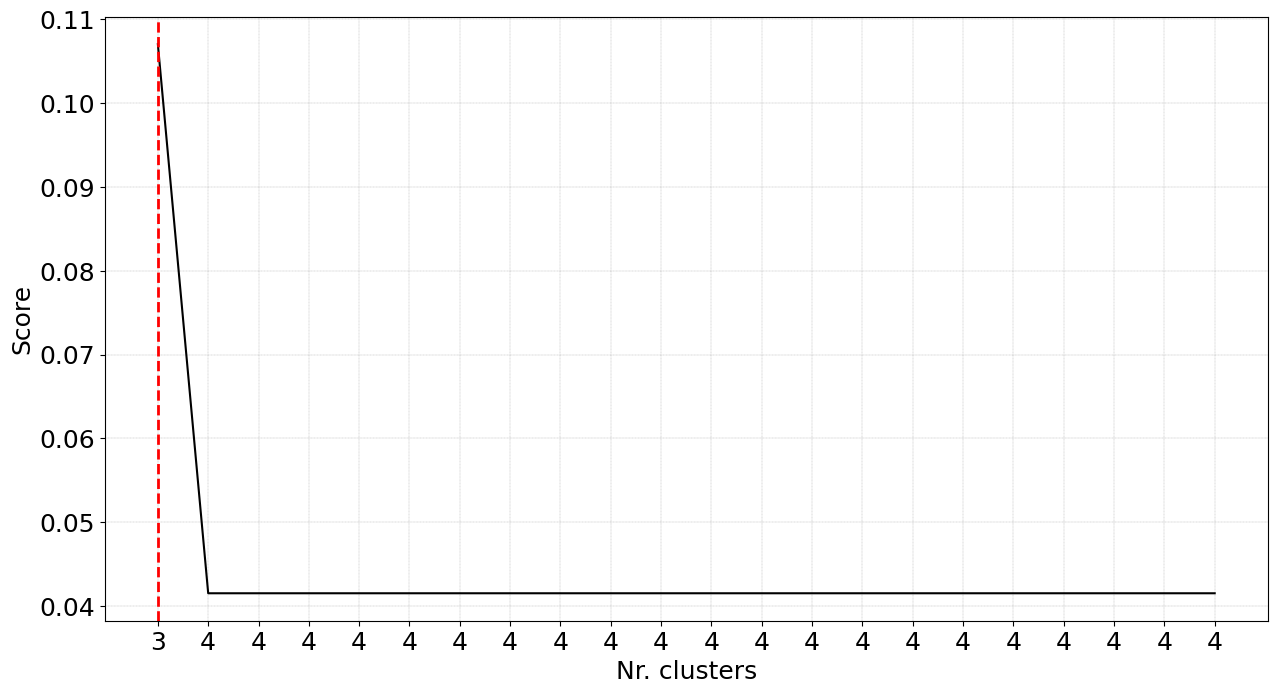

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [23]:
cl.clusteval.plot()
